In [8]:
import torch
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

from affine import sample

In [9]:
# Get the affine sampler to reproduce the target density function given here

# Target probability
def log_prob(theta):
    if not isinstance(theta, torch.Tensor):
        theta = torch.as_tensor(theta)

    x, y = torch.split(theta, (1, 1), dim=-1)  
    return -(1. / 20. * (1.0 - x) ** 2. + 10.0 * (y - x ** 2.) ** 2.).squeeze()

# Initialise walkers
n_params = 2
n_walkers = 500

walkers1 = torch.randn([n_walkers, n_params])
walkers2 = torch.randn([n_walkers, n_params])
current_state1, current_state2 = walkers1, walkers2
current_state = [current_state1, current_state2]

n_steps = 300

# Run the affine sampler
chain = sample(log_prob, n_params, n_walkers, n_steps, walkers1, walkers2)

burnin_steps = 100

Sampling: 100%|█████████▉| 299/300 [00:00<00:00, 5164.97it/s]


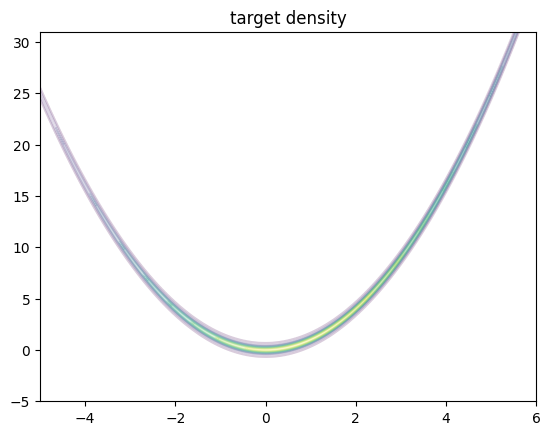

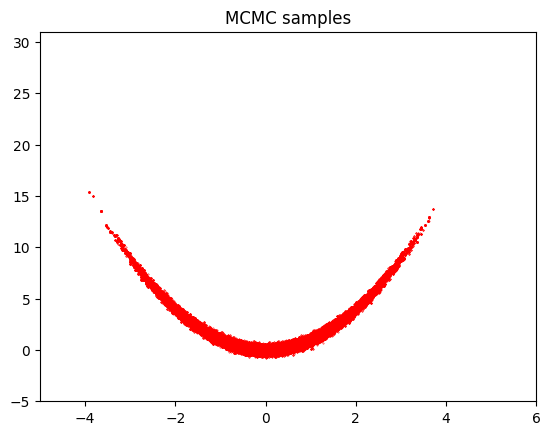

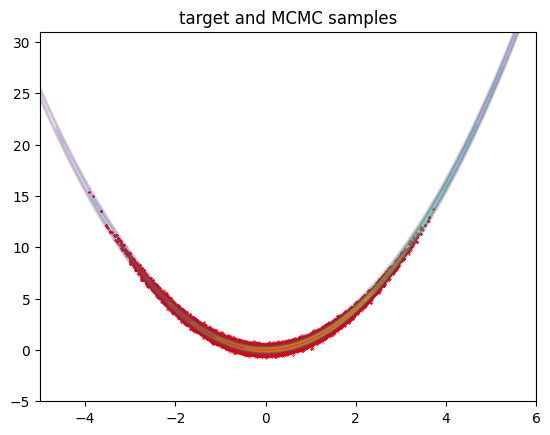

In [11]:
x = np.linspace(-5, 6, 500).astype(np.float32)
y = np.linspace(-5, 31, 500).astype(np.float32)
X, Y = np.meshgrid(x, y)
grid = np.stack([X, Y], -1)

L = torch.exp(log_prob(grid)).numpy()

contour_levels = np.array(
    [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]) * np.max(L.flatten())

# Target of MCMC
plt.contour(
    x, y, L,
    levels=contour_levels,
    alpha=0.2)
plt.title("target density")
plt.show()

# Scatter
plt.title("MCMC samples")
plt.scatter(
    chain.numpy()[burnin_steps:, :, 0],
    chain.numpy()[burnin_steps:, :, 1],
    s=0.1,
    color="red")
plt.xlim(-5, 6)
plt.ylim(-5, 31)
plt.show()

# Scatter + contours of target prob
plt.title("target and MCMC samples")
plt.contour(
    x, y, L,
    levels=contour_levels,
    alpha=0.2)
plt.scatter(
    chain.numpy()[burnin_steps:, :, 0],
    chain.numpy()[burnin_steps:, :, 1],
    s=0.05,
    color="red")
plt.show()